In [7]:
import warnings,os
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from PIL import Image,ImageFilter
from scipy.io import loadmat

In [8]:
def findClosestCentroids(X,centroids):
    '''Computes and returns the closest centroid label for the given samples'''
    m,n=X.shape
    # Number of clusters(K)
    K=centroids.shape[0]
    c=np.zeros(m)
    for i in range(m):
        x=X[i,:]
        norm=np.zeros(K)
        for k in range(K):
            norm[k]=np.dot((x-centroids[k,:]),(x-centroids[k,:]).T)
        c[i]=np.argmin(norm)
    return c

In [9]:
def computeCentroids(X,c,K):
    '''Computes and returns the new centroids by computing the means of samples assigned to that centroid'''
    m,n=X.shape
    centroids=np.zeros(shape=(K,n))
    for k in range(K):
        x=X[c==k,:]
        centroids[k,:]=x.mean(axis=0)
    return centroids

In [10]:
def runKMeans(X,K,maxIters,plotProgress=False):
    m,n=X.shape
    # Randomly selecting K centroids from X
    indices=np.random.randint(0,m,K)
    centroids=X[indices,:]
    history={}
    for i in range(1,maxIters+1):
        print(f'ITERATION : {i}',end='\r')
        c=findClosestCentroids(X,centroids)
        history[i]=centroids
        centroids=computeCentroids(X,c,K)
    if plotProgress==True and X.shape[1]==2:
        fig,ax=plt.subplots(figsize=(10,8))
        # Plotting points belonging to same cluster
        for k in range(K):
            x=X[c==k,:]
            sns.scatterplot(x[:,0],x[:,1],ax=ax,legend=False)
        # Plotting centroids history
        for i in range(1,maxIters):
            for k in range(K):
                temp=np.array([history[i][k,:],history[i+1][k,:]])
                sns.lineplot(temp[:,0],temp[:,1],color='black')
                sns.scatterplot(temp[:,0],temp[:,1],color='black',marker='x',s=50)
                if i+1==maxIters:
                    sns.scatterplot([temp[1,0]],[temp[1,1]],color='red',marker='x',s=100)
    return c,centroids

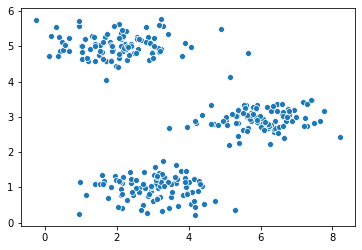

In [11]:
mat=loadmat('ex7data2.mat')
X=mat['X']
sns.scatterplot(X[:,0],X[:,1]);

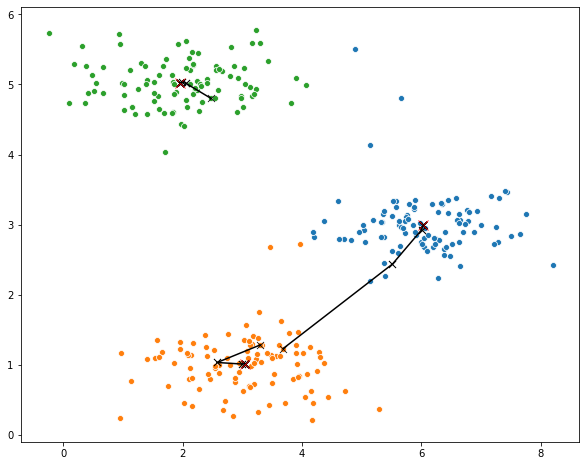

In [12]:
K=3
maxIter=10

labels,centroids=runKMeans(X,K,maxIter,plotProgress=True)

In [14]:
K=16
maxIter=5

img=Image.open('bird_small.png')
mat=np.asarray(img)
print(f'IMAGE DIMENSION : {mat.shape}')
X=mat.reshape((-1,3))
print(f'X SHAPE : {X.shape}')

labels,centroids=runKMeans(X,K,maxIter)
print(f'\n\nTOP {K} COLORS :\n\n',centroids)

IMAGE DIMENSION : (128, 128, 3)
X SHAPE : (16384, 3)
ITERATION : 5

TOP 16 COLORS :

 [[138.02228412 123.49582173 122.23955432]
 [150.70249221 161.05919003 184.12772586]
 [141.83240223 119.59217877  89.73184358]
 [149.65306122 142.69387755 111.33333333]
 [165.12516824 116.40242261  45.7039031 ]
 [158.40322581 104.80645161  92.47311828]
 [114.33179724 107.08294931  86.20276498]
 [129.10132159  99.46696035  94.89867841]
 [ 84.35294118  97.69411765 136.4745098 ]
 [183.14147287 157.75193798 125.27034884]
 [236.858665   217.52616735 178.80946412]
 [ 83.5700431   74.20797414  73.02693966]
 [174.49440716 138.60402685  75.46532438]
 [218.49215143 167.03416436  93.13434903]
 [108.20571429  76.77142857  44.12857143]
 [ 29.56777442  30.76636455  28.45035247]]


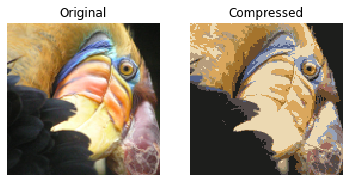

In [15]:
xCompressed=centroids[labels.astype(int),:]
xCompressed=np.uint8(xCompressed.reshape(mat.shape))
fig,ax=plt.subplots(1,2)
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(Image.fromarray(xCompressed))
ax[1].set_title('Compressed')
ax[1].axis('off');

In [18]:

K=6
maxIter=10

img=Image.open('parrot.png')
mat=np.asarray(img)
print(f'IMAGE DIMENSION : {mat.shape}')
X=mat.reshape((-1,3))
print(f'X SHAPE : {X.shape}')

labels,centroids=runKMeans(X,K,maxIter)
print(f'\n\nTOP {K} COLORS :\n\n',centroids)

IMAGE DIMENSION : (200, 200, 3)
X SHAPE : (40000, 3)
ITERATION : 10

TOP 6 COLORS :

 [[       nan        nan        nan]
 [113.710425 130.65655   59.155175]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]


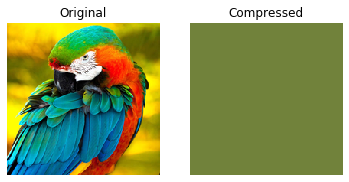

In [19]:
xCompressed=centroids[labels.astype(int),:]
xCompressed=np.uint8(xCompressed.reshape(mat.shape))
fig,ax=plt.subplots(1,2)
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(Image.fromarray(xCompressed))
ax[1].set_title('Compressed')
ax[1].axis('off');

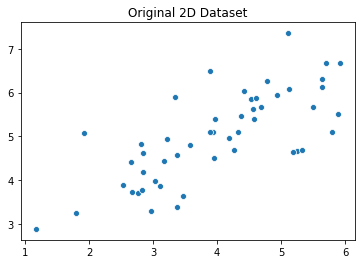

In [20]:
mat=loadmat('./ex7data1.mat')
X=mat['X']
fig=sns.scatterplot(X[:,0],X[:,1]);
fig.set(title='Original 2D Dataset');

In [21]:
def featureNormalize(X):
    '''Returns the normalized matrix'''
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    xNormalized=(X-mean)/std
    return xNormalized

EIGENVALUES : 
[1.77094936 0.26986696]

EIGENVECTORS : 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


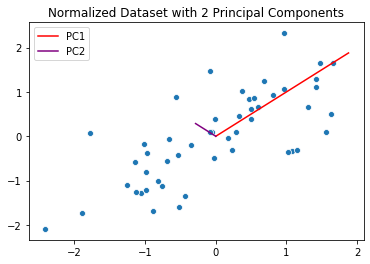

In [22]:
# Normalizing
X=featureNormalize(X)
# Computing covariance
C=np.cov(X.T)
# Computing eigenvectors
eigenValues,eigenVectors=np.linalg.eig(C)
# Sorting eigenvectors based on eigenvalues
idx=eigenValues.argsort()[::-1]
eigenValues=eigenValues[idx]
eigenVectors=eigenVectors[:,idx]

print("EIGENVALUES : ",eigenValues,sep='\n',end='\n\n')
print("EIGENVECTORS : ",eigenVectors,sep='\n')


fig=sns.scatterplot(X[:,0],X[:,1]);
points=list(zip([0,0],1.5*eigenValues[0]*eigenVectors[:,0]))
sns.lineplot(*points,label='PC1',color='red')
points=list(zip([0,0],1.5*eigenValues[1]*eigenVectors[:,1]))
sns.lineplot(*points,label='PC2',color='purple');
fig.set(title='Normalized Dataset with 2 Principal Components');

(50, 1)


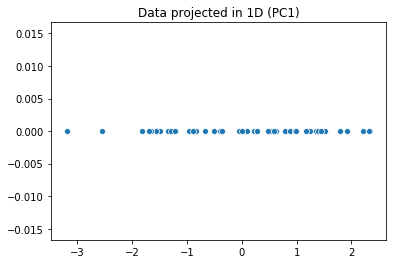

In [23]:
# Selecting top k principal components from eigenvectors matrix
k=1
principalComponents=eigenVectors[:,:k]
# Projecting the centered data matrix using only the top K eigenvectors
Z=X.dot(principalComponents)
print(Z.shape)
fig=sns.scatterplot(Z.reshape(-1),0);
fig.set(title='Data projected in 1D (PC1)');

In [24]:
xRec=Z.dot(principalComponents.T)
print(xRec.shape)
xRec[:5]


(50, 2)


array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292]])

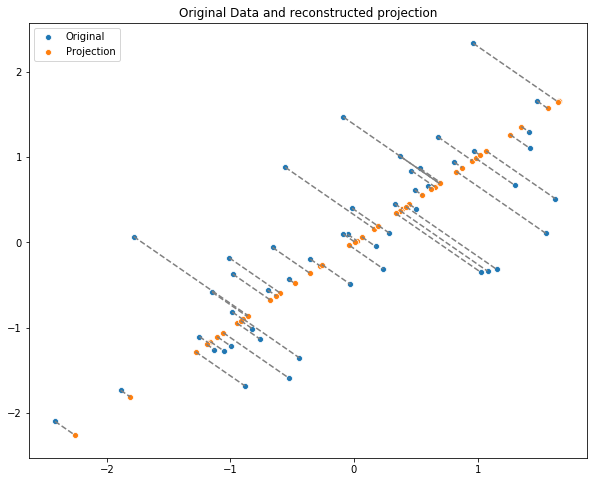

In [25]:

fig,ax=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(X[:,0],X[:,1],label='Original');
sns.scatterplot(xRec[:,0],xRec[:,1],label='Projection');
for i in range(X.shape[0]):
    points=list(zip(X[i,:],xRec[i,:]))
    sns.lineplot(*points,color='gray')
    ax.lines[i].set_linestyle('--')
ax.set(title='Original Data and reconstructed projection');

In [26]:

mat=loadmat('./ex7faces.mat')
print(*mat.keys(),sep='\n')

# Loading data from mat to Dataframe
X=mat['X']
m,n=X.shape

data=pd.DataFrame()
for i in range(n):
    data[f'x{i+1}']=X[:,i]

print('TRAINING DATASET SHAPE : {0} X {1}'.format(*data.shape))
data.sample(5)

__header__
__version__
__globals__
X
TRAINING DATASET SHAPE : 5000 X 1024


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x1015,x1016,x1017,x1018,x1019,x1020,x1021,x1022,x1023,x1024
4411,-22.866314,-20.866314,-25.866314,-37.866314,-20.866314,-14.866314,-10.866314,-11.866314,-14.866314,-17.866314,...,86.133686,88.133686,88.133686,87.133686,84.133686,69.133686,46.133686,13.133686,-14.866314,-7.866314
311,-76.866314,-72.866314,-85.866314,-99.866314,-106.866314,-101.866314,-98.866314,-105.866314,-104.866314,-84.866314,...,-30.866314,-31.866314,-32.866314,-35.866314,-38.866314,-41.866314,-46.866314,-56.866314,-68.866314,-74.866314
4021,9.133686,13.133686,-2.866314,-12.866314,14.133686,21.133686,30.133686,27.133686,24.133686,27.133686,...,-3.866314,-19.866314,-19.866314,-4.866314,16.133686,34.133686,47.133686,54.133686,55.133686,26.133686
2051,-47.866314,-46.866314,-46.866314,-45.866314,-46.866314,-46.866314,-45.866314,-44.866314,-45.866314,-46.866314,...,13.133686,10.133686,7.133686,3.133686,-4.866314,-10.866314,-8.866314,-5.866314,2.133686,4.133686
3926,-80.866314,-65.866314,-54.866314,-48.866314,-43.866314,-42.866314,-55.866314,-65.866314,-44.866314,-30.866314,...,-98.866314,-98.866314,-98.866314,-113.866314,-98.866314,-82.866314,-82.866314,-85.866314,-85.866314,-85.866314


In [27]:
def displayData(X,title=None):
    m,n=X.shape
    width=int(np.sqrt(n))
    height=int(n/width)
    rows=int(np.floor(np.sqrt(m)))
    cols=int(np.ceil(m/rows))
    totalWidth=cols+cols*width
    displayArray=np.zeros((1,totalWidth))
    rowPadding=np.ones((1,totalWidth))*np.min(X)
    colPadding=np.ones((height,1))*np.min(X)
    index=0
    for i in range(rows):
        row=colPadding*0
        for j in range(cols):
            if index<m:
                x=X[index].reshape((width,height)).T
                index=index+1
            else:
                x=np.zeros((width,height)).T
            row=np.column_stack((row,x))
            if j<cols-1:
                row=np.column_stack((row,colPadding))
        displayArray=np.row_stack((displayArray,row))
        if i<rows-1:
            displayArray=np.row_stack((displayArray,rowPadding))
    displayArray=np.row_stack((displayArray,rowPadding*0))
    plt.imshow(displayArray,cmap='gray')
    plt.title(title)
    plt.axis('off')

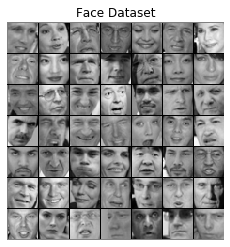

In [28]:
randomIndices=np.random.randint(0,X.shape[0],49)
displayData(X[randomIndices,:],'Face Dataset');

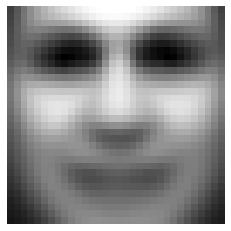

In [29]:
plt.imshow(X.mean(axis=0).reshape((32,32)).T,cmap='gray')
plt.axis('off');

In [30]:
# Normalizing
X=featureNormalize(X)
# SVD
U,S,VT=np.linalg.svd(X)
V=VT.T
# Sorting singular vector based on singular values
idx=S.argsort()[::-1]
S=S[idx]
V=V[:,idx]

print(f'U : {U.shape}')
print(f'S : {S.shape}')
print(f'V : {V.shape}')

U : (5000, 5000)
S : (1024,)
V : (1024, 1024)


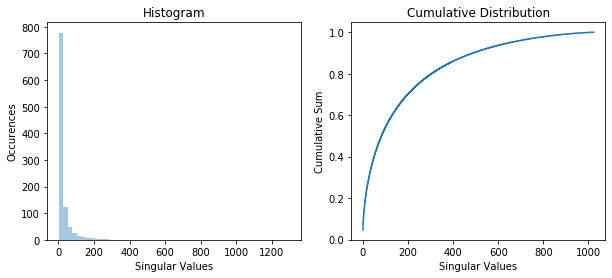

In [31]:

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
chart1=sns.distplot(S,kde=False,ax=ax[0]);
chart1.set(xlabel='Singular Values',ylabel='Occurences',title='Histogram')
s=S/np.sum(S)
chart2=sns.lineplot(list(range(len(s))),np.cumsum(s),drawstyle='steps',ax=ax[1])
chart2.set(xlabel='Singular Values',ylabel='Cumulative Sum',title='Cumulative Distribution');

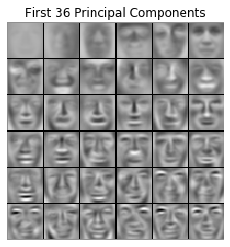

In [32]:
k=36
principalComponents=V[:,:k]
displayData(principalComponents.T,f'First {k} Principal Components');

In [33]:
# Selecting top k principal components from singular vector matrix
k=100
principalComponents=V[:,:k]
# Projecting the centered data matrix using only the top K singular vectors
Z=X.dot(principalComponents)
Z.shape

(5000, 100)

In [34]:
xRec=Z.dot(principalComponents.T)
print(xRec.shape)

(5000, 1024)


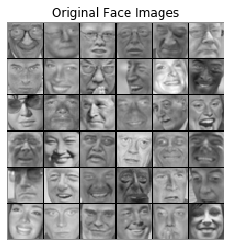

In [35]:
displayData(X[:36],'Original Face Images');

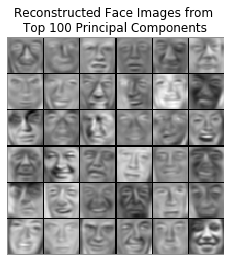

In [36]:
displayData(xRec[:36],f'Reconstructed Face Images from \nTop {k} Principal Components')